# K-Means Clustering

<br>
به طور کلی الگوریتم های بدون ناظر شامل دو دسته کلی می شوند
<br>
**clustering**
<br>
**dimentionaly reduction**
<br>

یه فرق اصلی الگوریتم های بدون ناظر با الگوریتم های با ناظر در اینه که ما دیگه **شاخص** خاصی برای اندازه گیری دقیق و ارزیابی مدل مون **نداریم**. از اونجایی که اصلا **خروجی وجود نداره** که بخوایم پیشبینی مون رو با اون بسنجیم.بنابرین نیازی به ترین تست اسپلیت هم نداریم
<br>

## Kmeans
##### نوعی از الگوریتم های معروف به منظور خوشه بندیه که روش کلی کار اون به صورت زیر هست:

<br>

ابتدا تعداد **کی** نقطه از داده ها رو به صورت رندوم انتخاب می کنه و به هر کدوم برچسب یه گروه رو میزنه. در مرحله بعد به داده های دیگه بر حسب **نزدیکی** به هر کدوم از این گروه ها، یک **برچست** گروه زده میشه. حالا تعداد کی گروه از داده ها داریم. **میانگین** هر کدوم از این گروه ها گرفته و به عنوان یه **نقطه جدید** در نظر گرفته میشه.  **مجددا** فعالیت های انجام شده نسبت به این نقاط جدید انجام میشه و به مرور گروه بندی ها دقیق و دقیق تر میشن
<br>


##### نکات مربوط به الگوریتم

به نکته این که در الگوریتم کی مینز! داده ها باید همه از جنس **عدد** باشن. از اونجایی که ما داریم **فاصله** رو حساب می کنیم
<br>

نکته دیگه این که داده هامون باید به **استاندارسازی** شده باشن
<br>

نکته آخر هم این که دقیقا چطوری باید **تعداد خوشه ها** رو تعیین کنیم؟
<br>

هیچ جواب 100 در صد درستی به این سوال وجود نداره! اما 3 موضوع میتونه در رسیدن به پاسخ بهتر این سوال به ما کمک کنه
<br>


1. دانش عمومی
 <br>

مثلا من یه تولیدی لباس دارم و می دونم قرار نیست 100 نوع سایز لباس داشته باشم. احتمالا 5 یا 6 نوع گروه مختلف می تونه قابل قبول باشه
 <br>
 
2. مصور سازی و فهم بیشتر داده ها
 <br>
همیشه قدم اول مصور سازیه و در اینجا خیلی می تونه به ما راجع به گروه های مختلف اطلاعات بیشتری به ما بده
 <br>

3. elbow method
 <br>
 بعد از این که مرکز هر گروه مشخص شد، فاصله ی داده های هر گروه از اون مرکز ها حساب میشه که به این فاصله


<br>

**SSD** Sum Squred Distance
 <br>
 می گیم. در نهایت و زمانی که تعداد گروه ها به سمت صفر میل می کنن، این مشخصه برابر با صفر مشه. با رسم تعداد گروه های مختلف در مقابل این مشخصه متوجه میشیم باز هم جواب 100 درصد صحیحی وجود نداره! اما در یه جاهایی از نمودار مشاهده میشه که با افزایش گروه، خطای مذکور به مقدار **خیلی کم تری** نسبت به مرحله قبل، **کاهش پیدا کرده**. این نقاط می تونن نقاط بهینه تری برای مسئله ما باشن 

<br> 

----

## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## درباره دیتا
LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   دیتاست مربوط به مشتریان یک بانک است که جزییات آن به شرح زیر می باشد. قرار است دسته های مختلفی از مشتریان را با توجه به ویژگی های شان تعریف کنیم

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## EDA
کاوش در میان داده ها و فهم بیشتر از آن ها به عنوان اولین قدم

In [2]:
df = pd.read_csv("../DATA/bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

متوجه می شویم داده نالی وجود ندارد. همچنین جنس بعضی از متغیر ها به صورت عددی نمی باشد که بعدا باید برای رفع این مشکل اقدام کنیم

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Continuous Feature Analysis
متغیر هایی که از جنس عدد و به صورت پیوسته هستند را به تصویر در می آوریم. همان طور که می دونیم، هیستوگرام از نمودار های پرکاربرد برای این متغییر ها می باشد

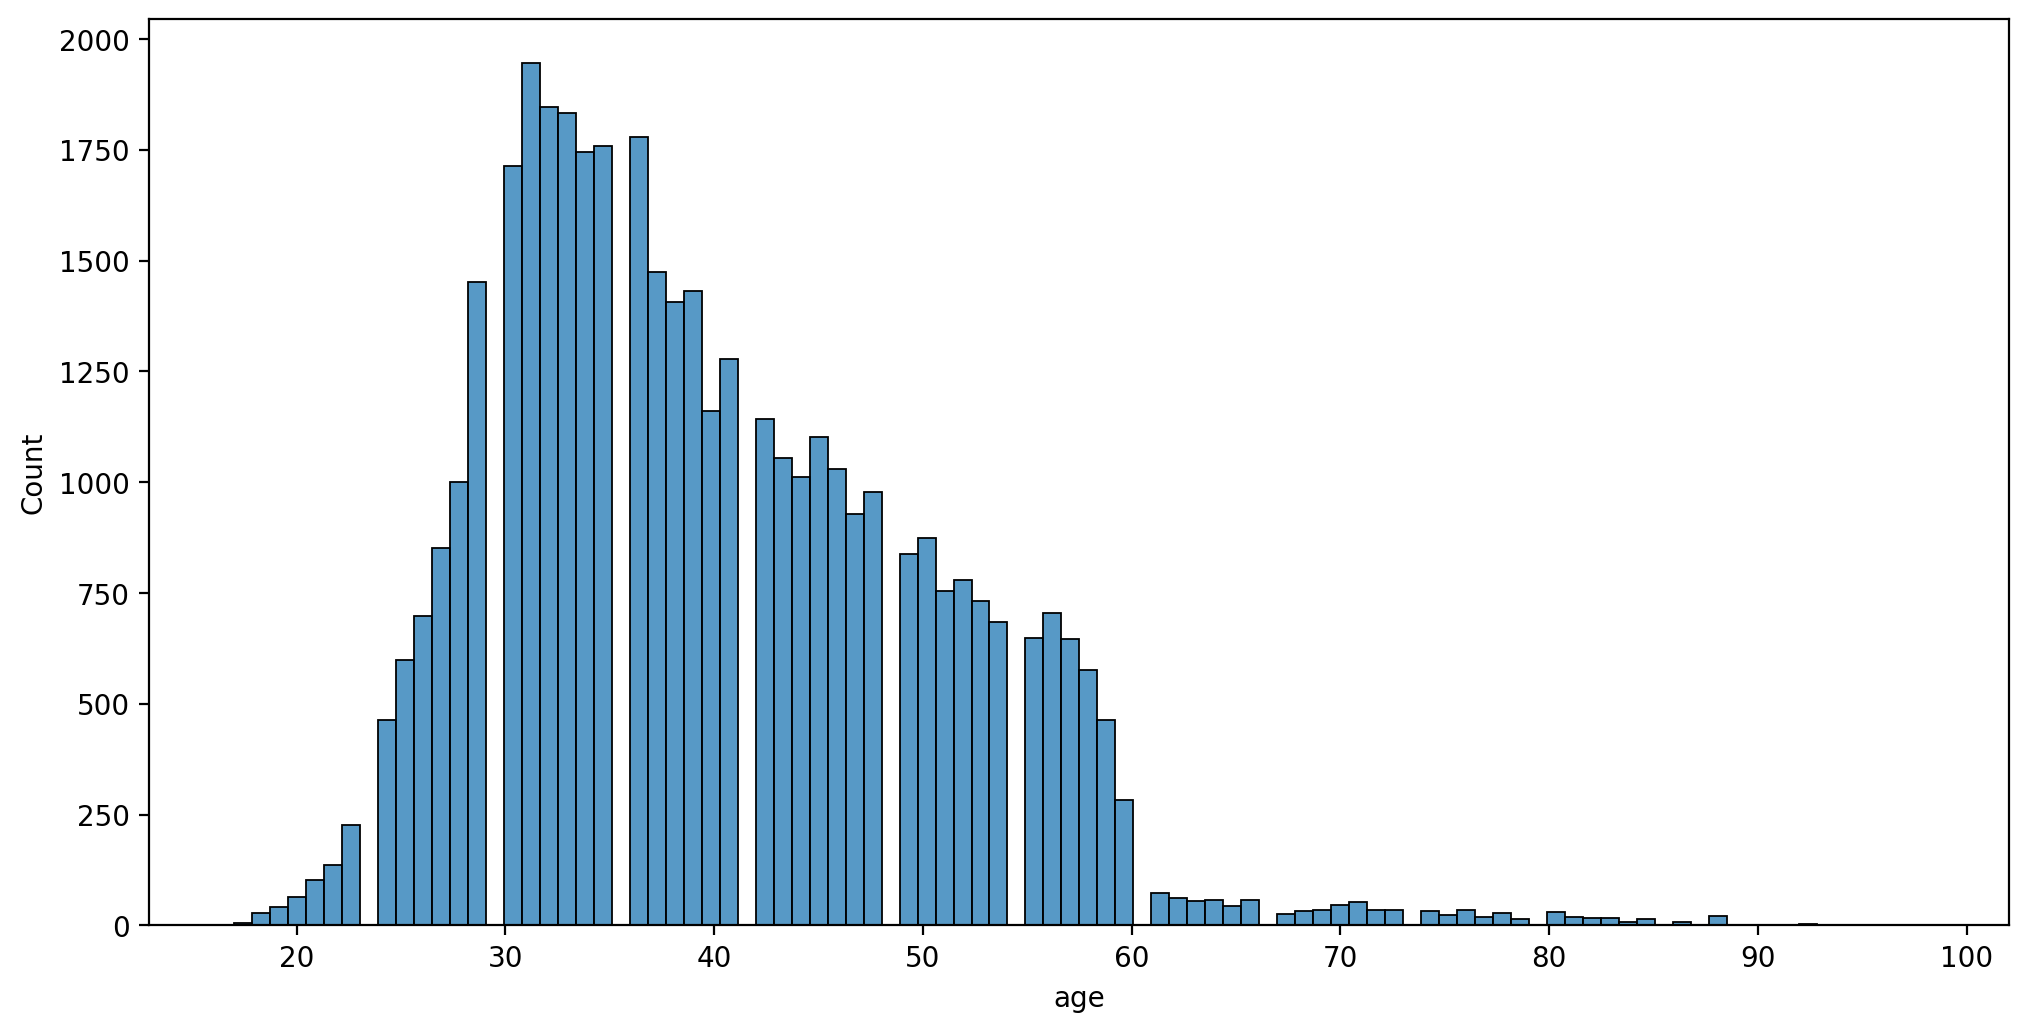

In [6]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age')

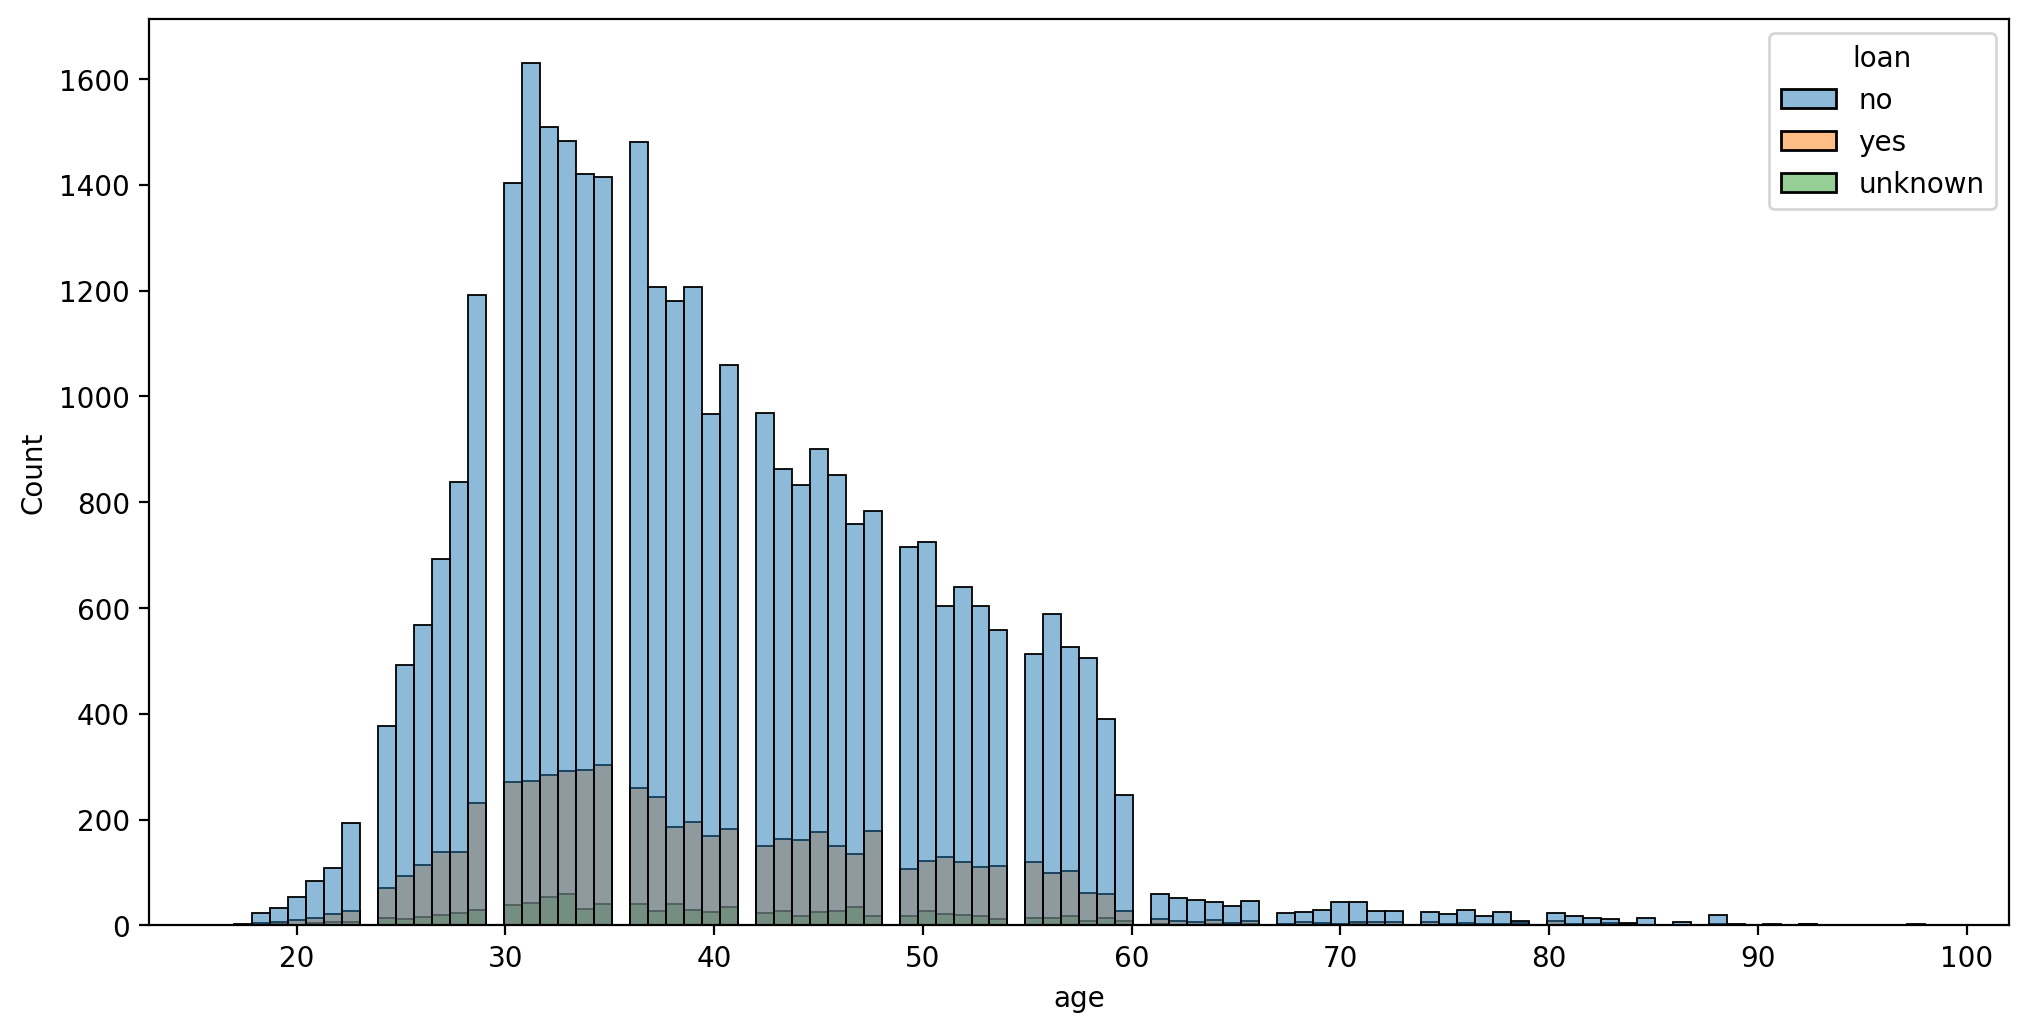

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

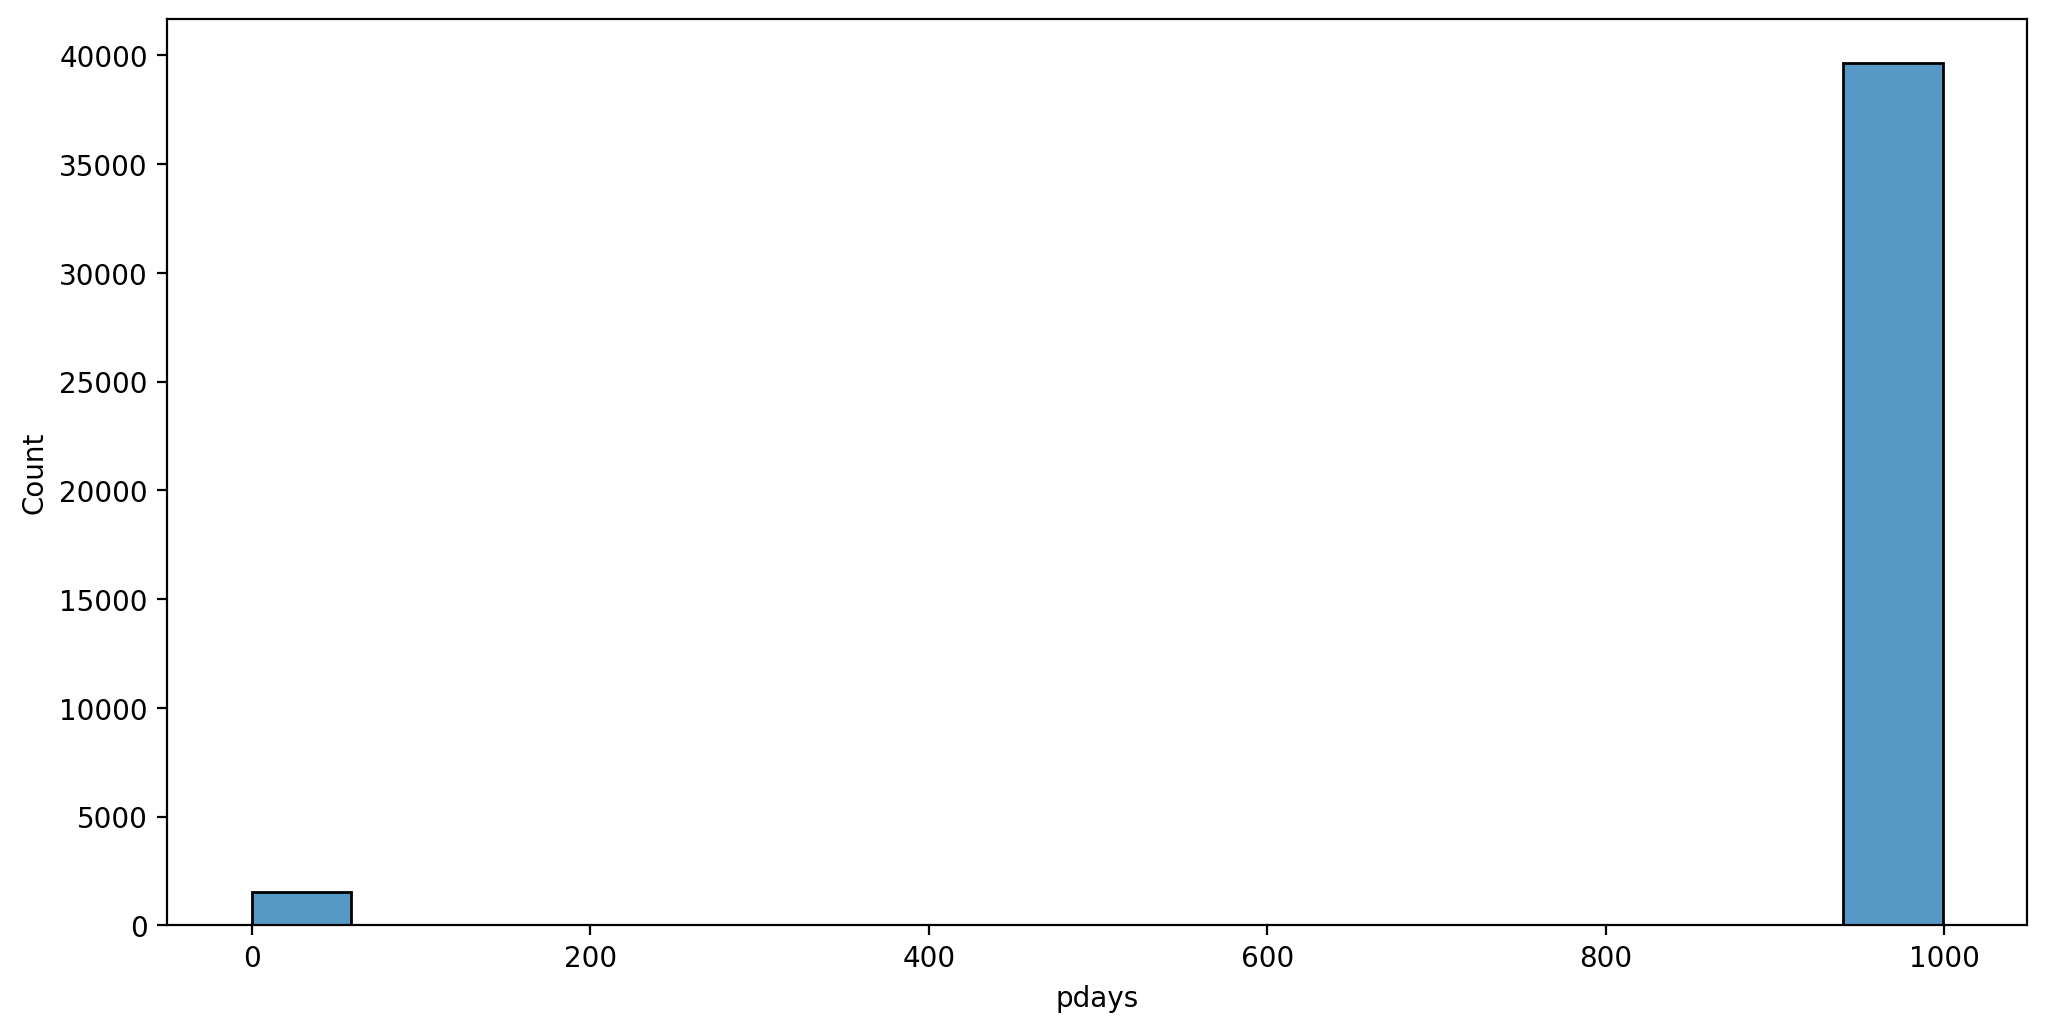

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

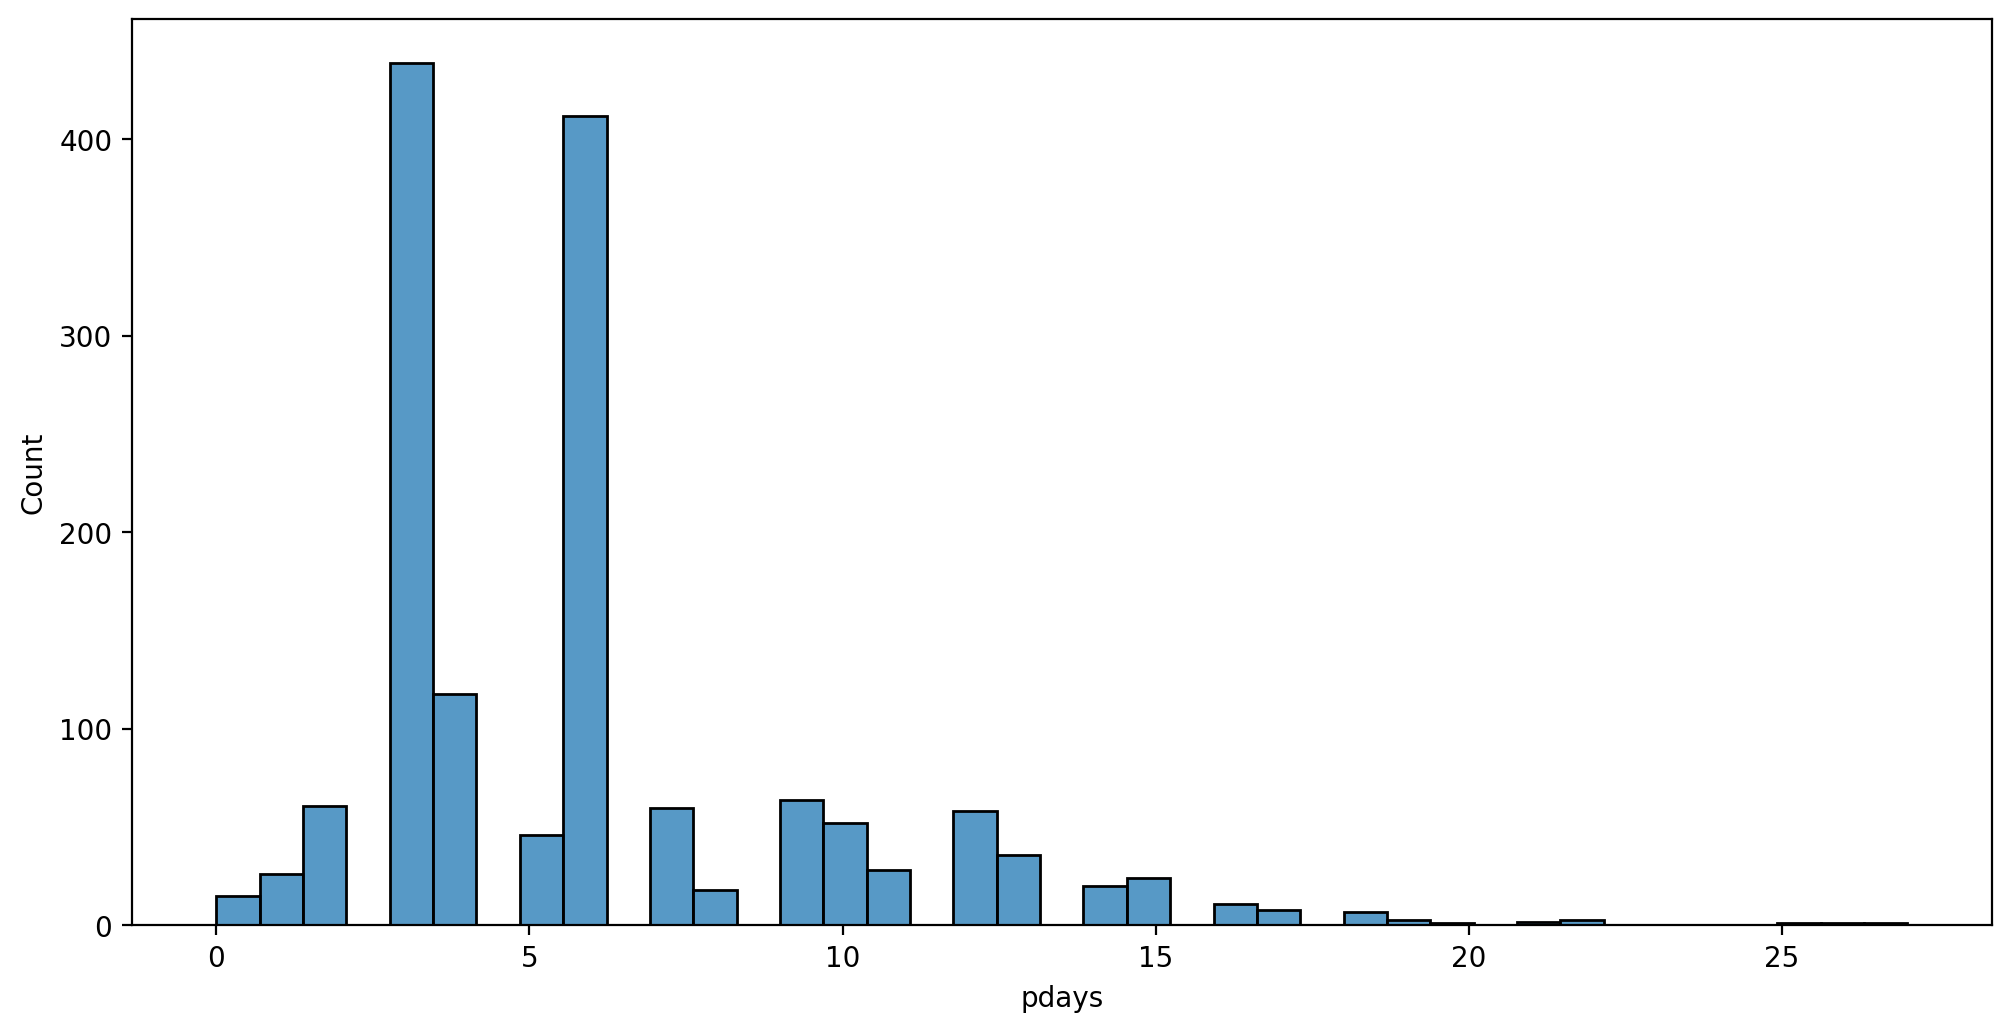

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**مدت زمان هایی که با مشتری در تماس بودیم چه قدر طور کشیده؟ با جداسازی دو پلتفرم تلفن ثابت و موبایل**

(0.0, 2000.0)

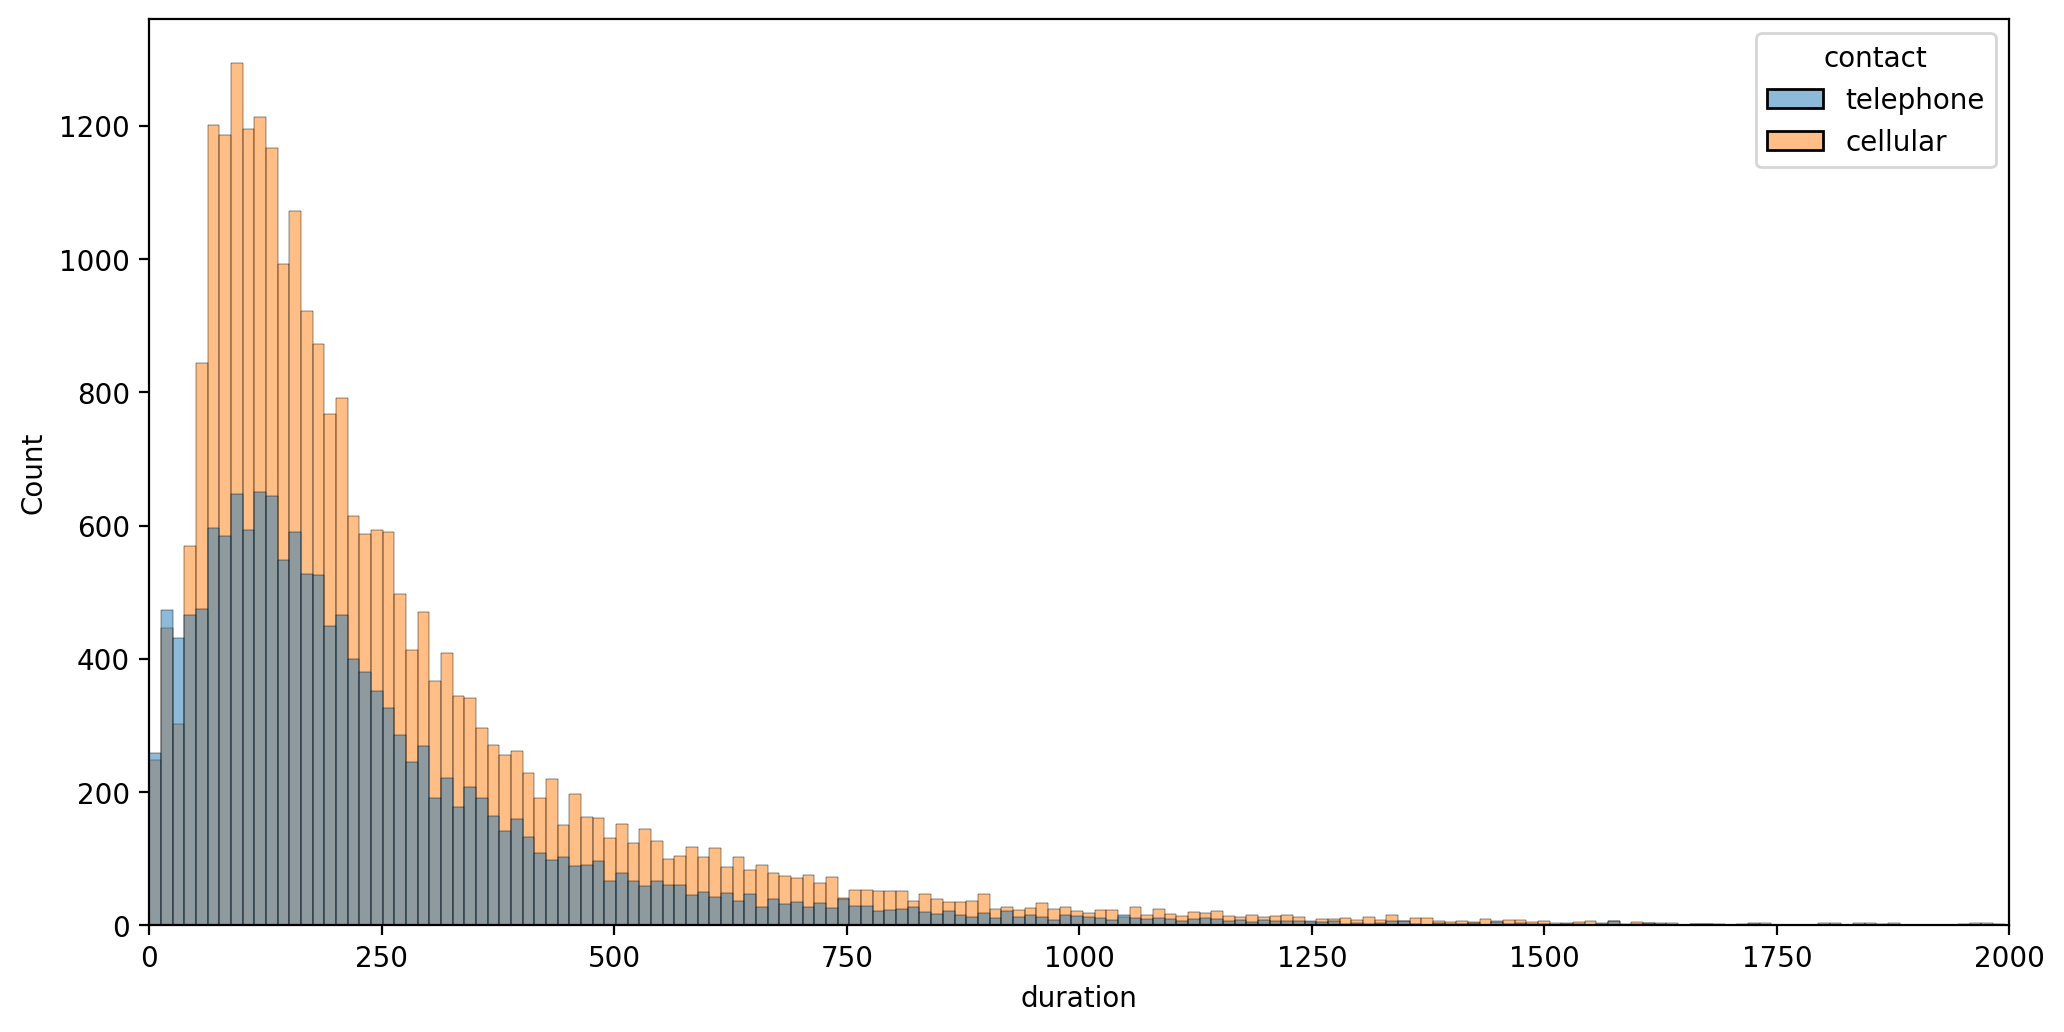

In [176]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

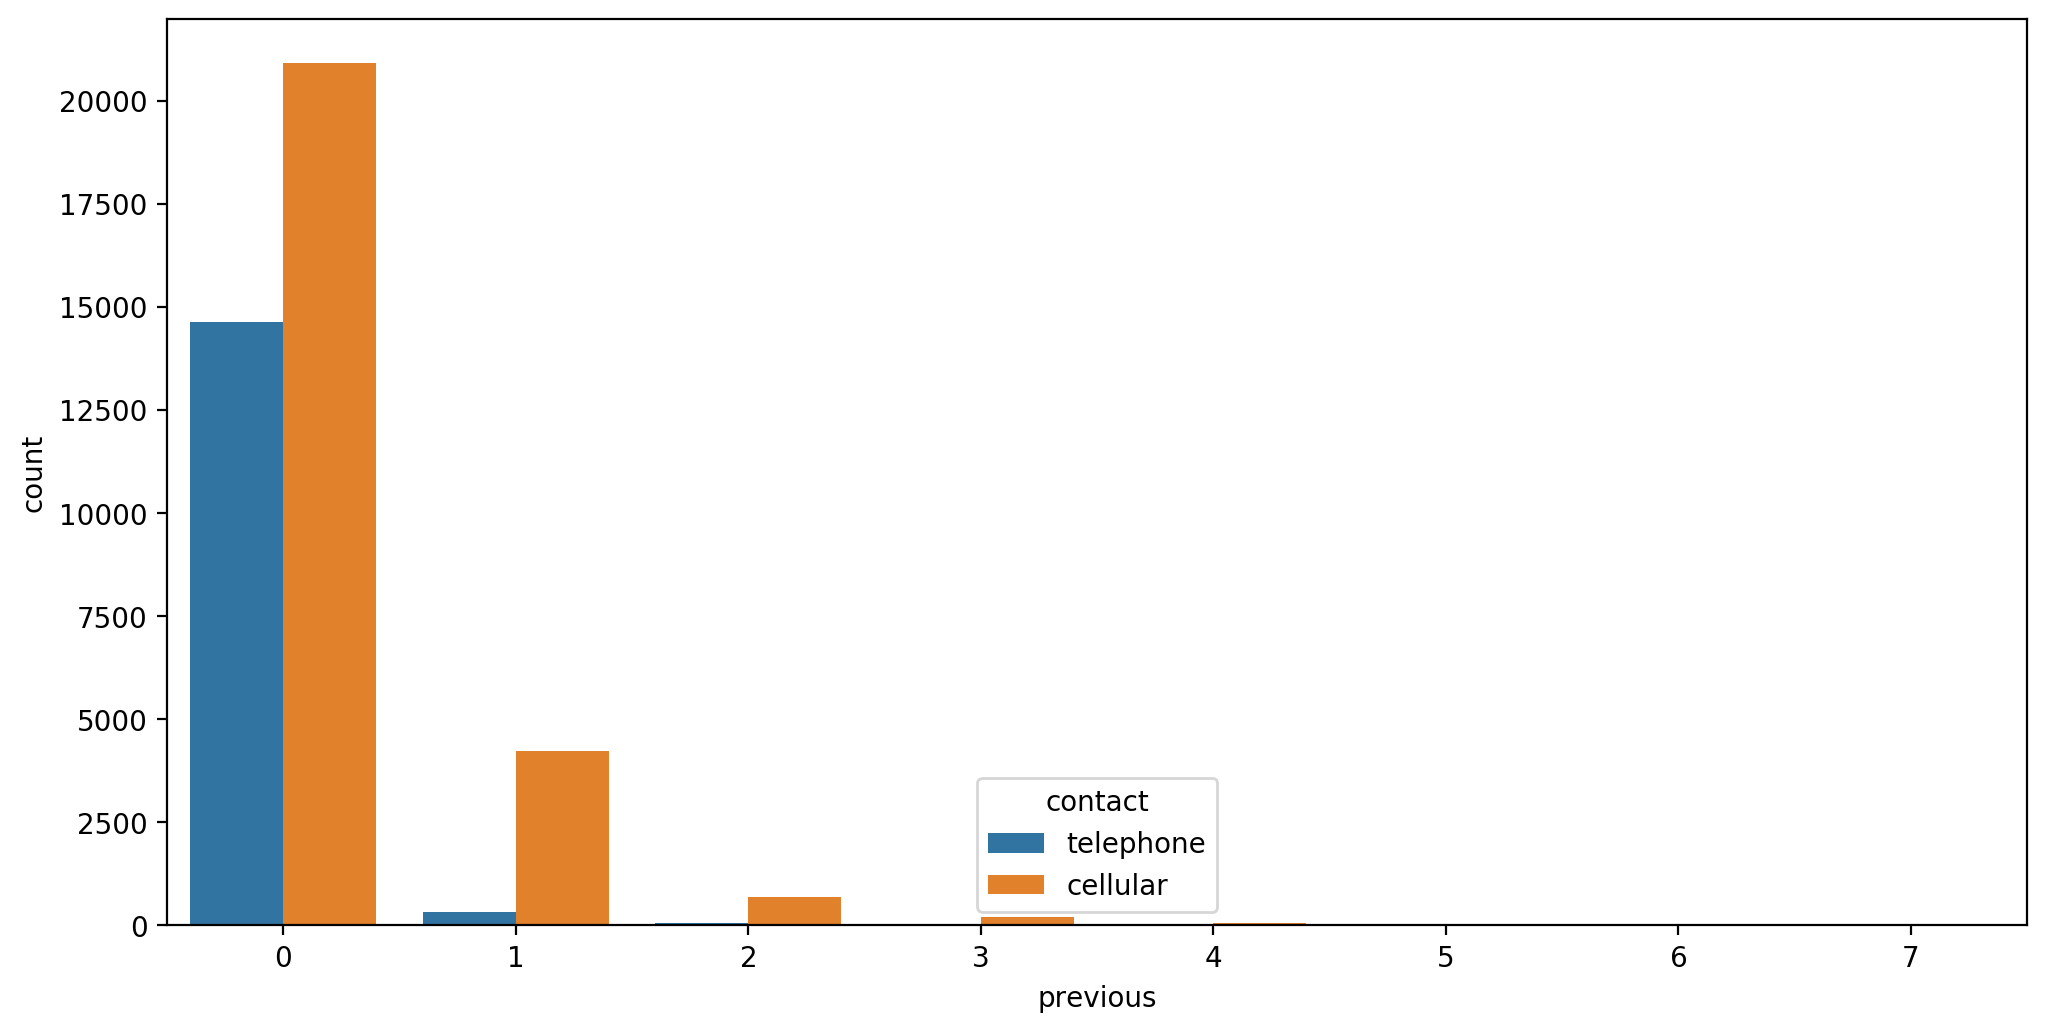

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

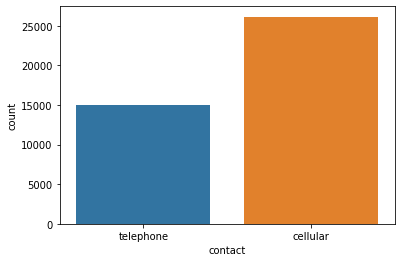

In [12]:
sns.countplot(data=df,x='contact')

## Categorical Features
در ادامه به مصور سازی متغیر هایی که به صورت گسسته هستند می پردازیم. معروف ترین نمودارها برای این کار، بار پلات ها هستن

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


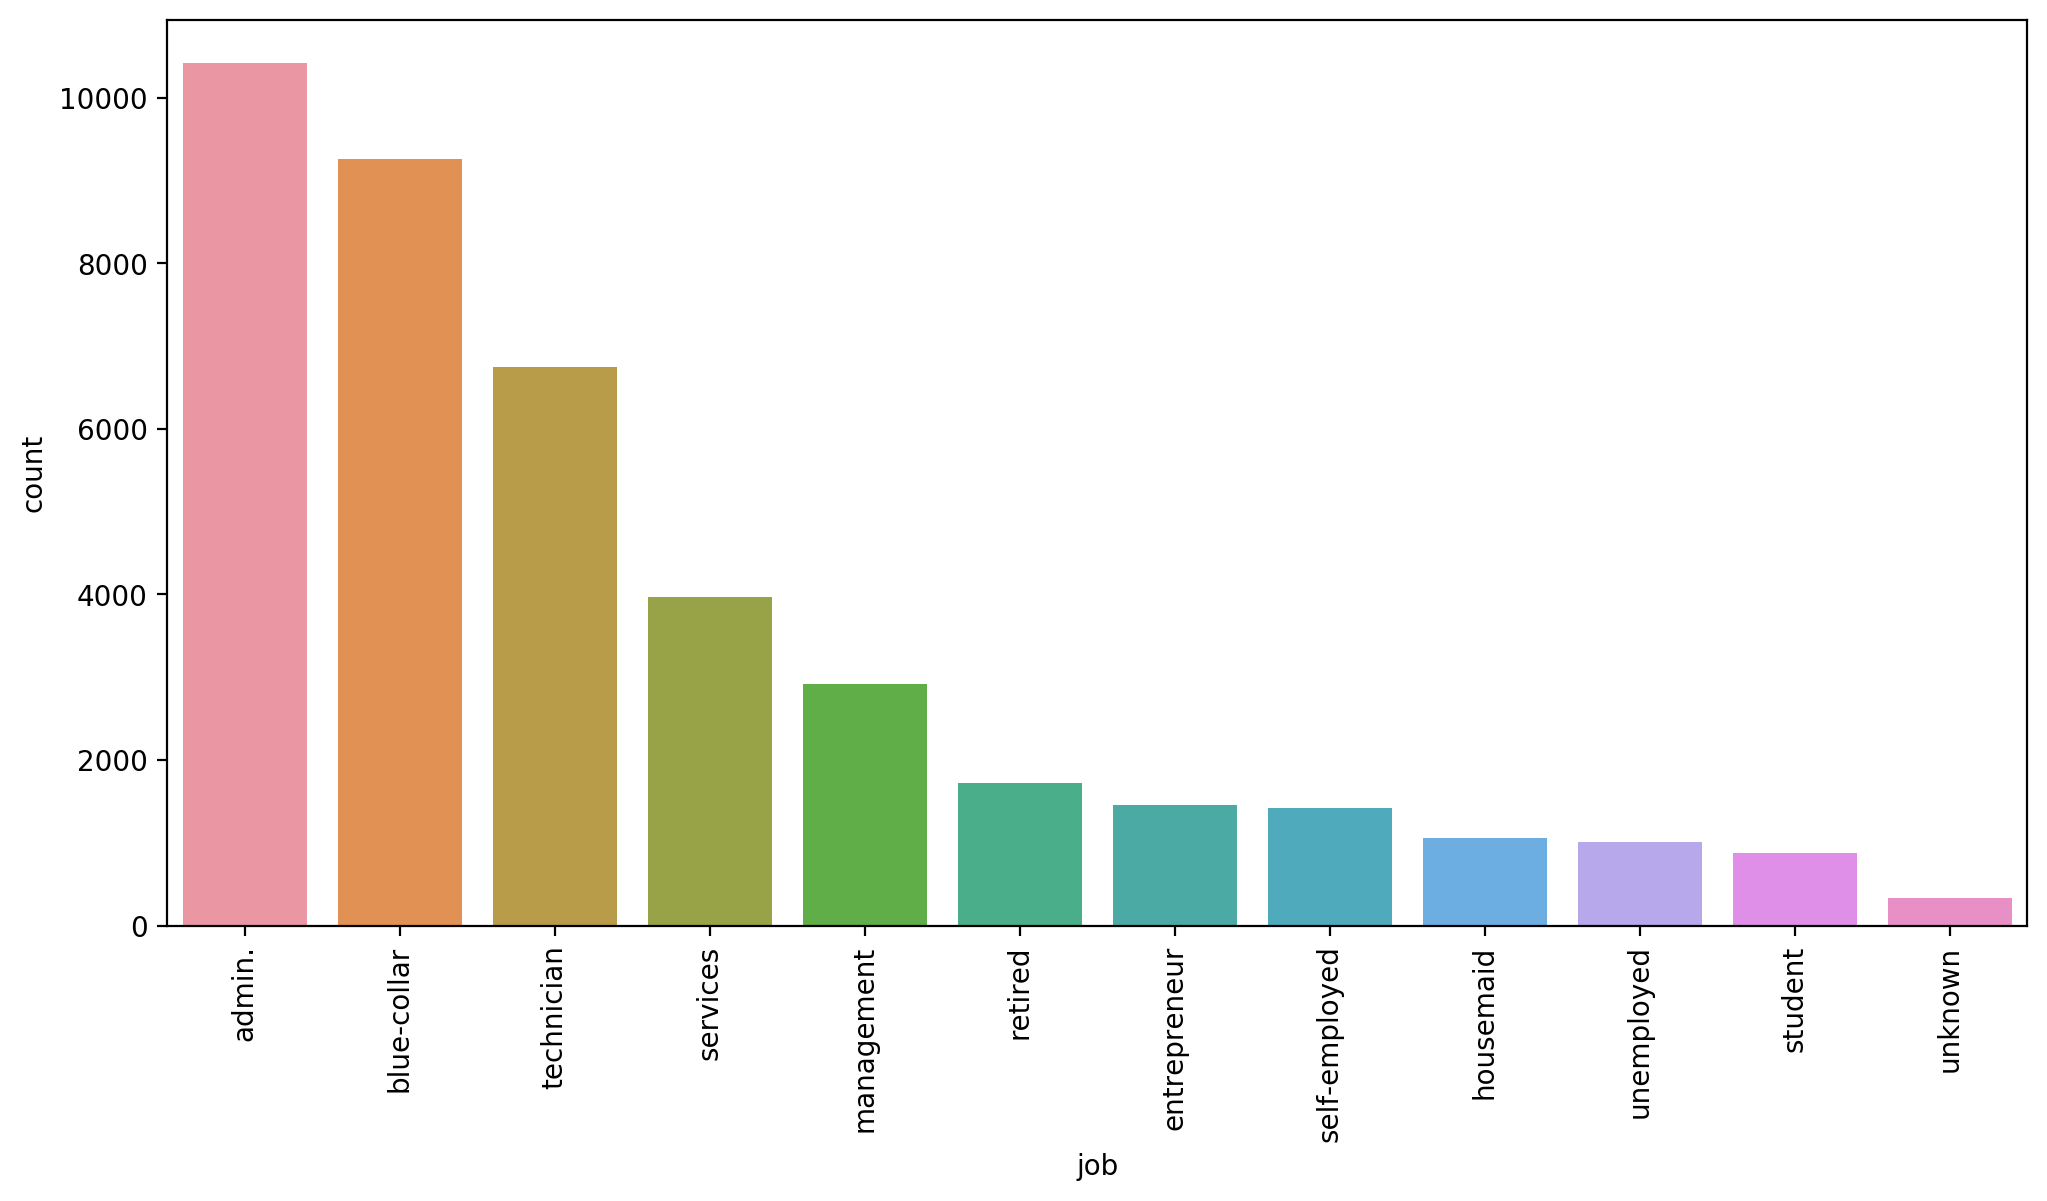

In [14]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

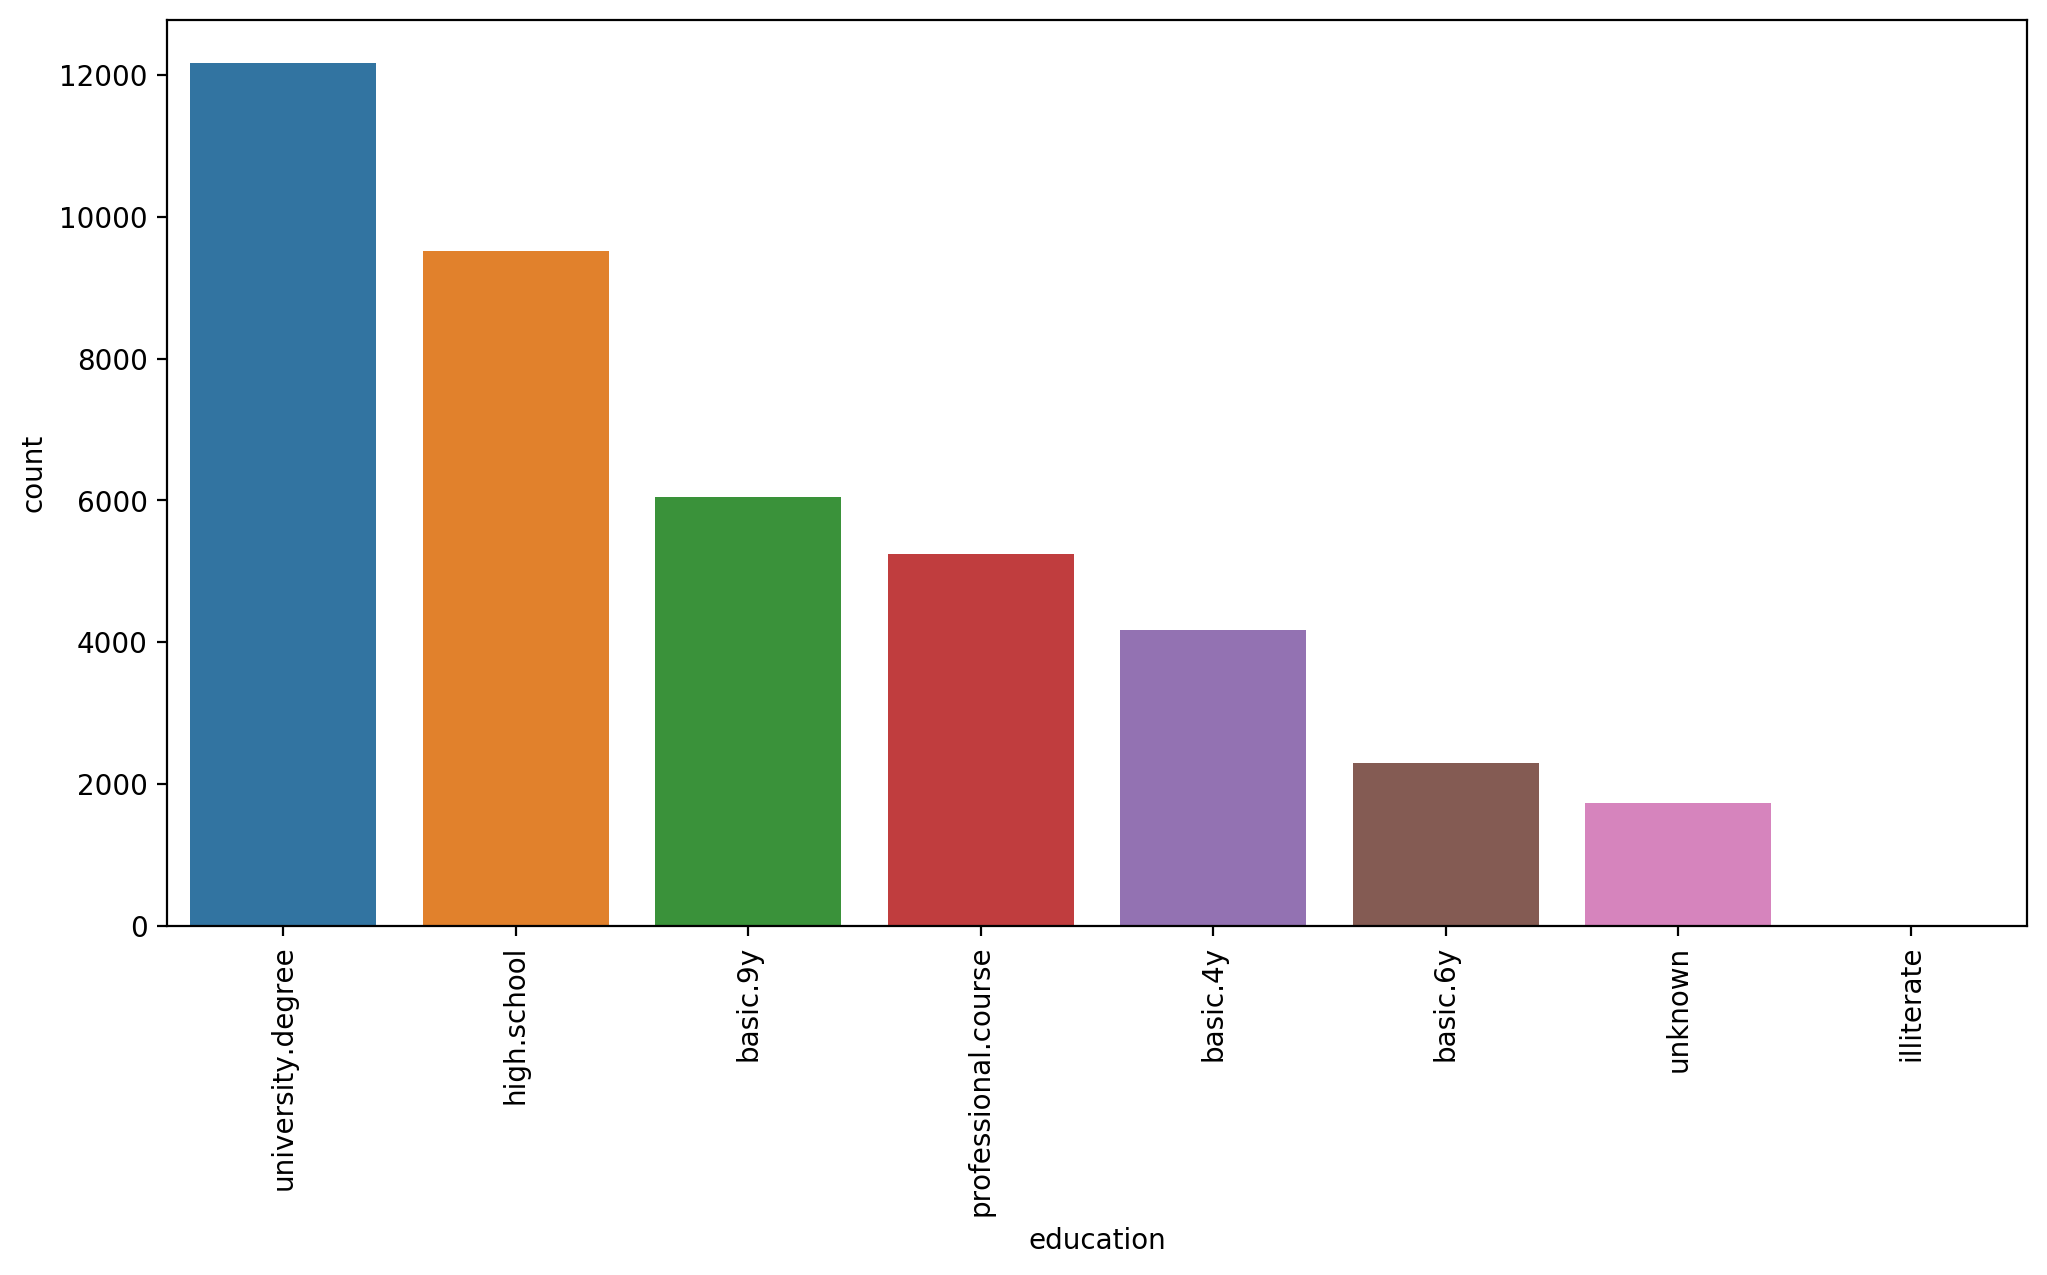

In [15]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

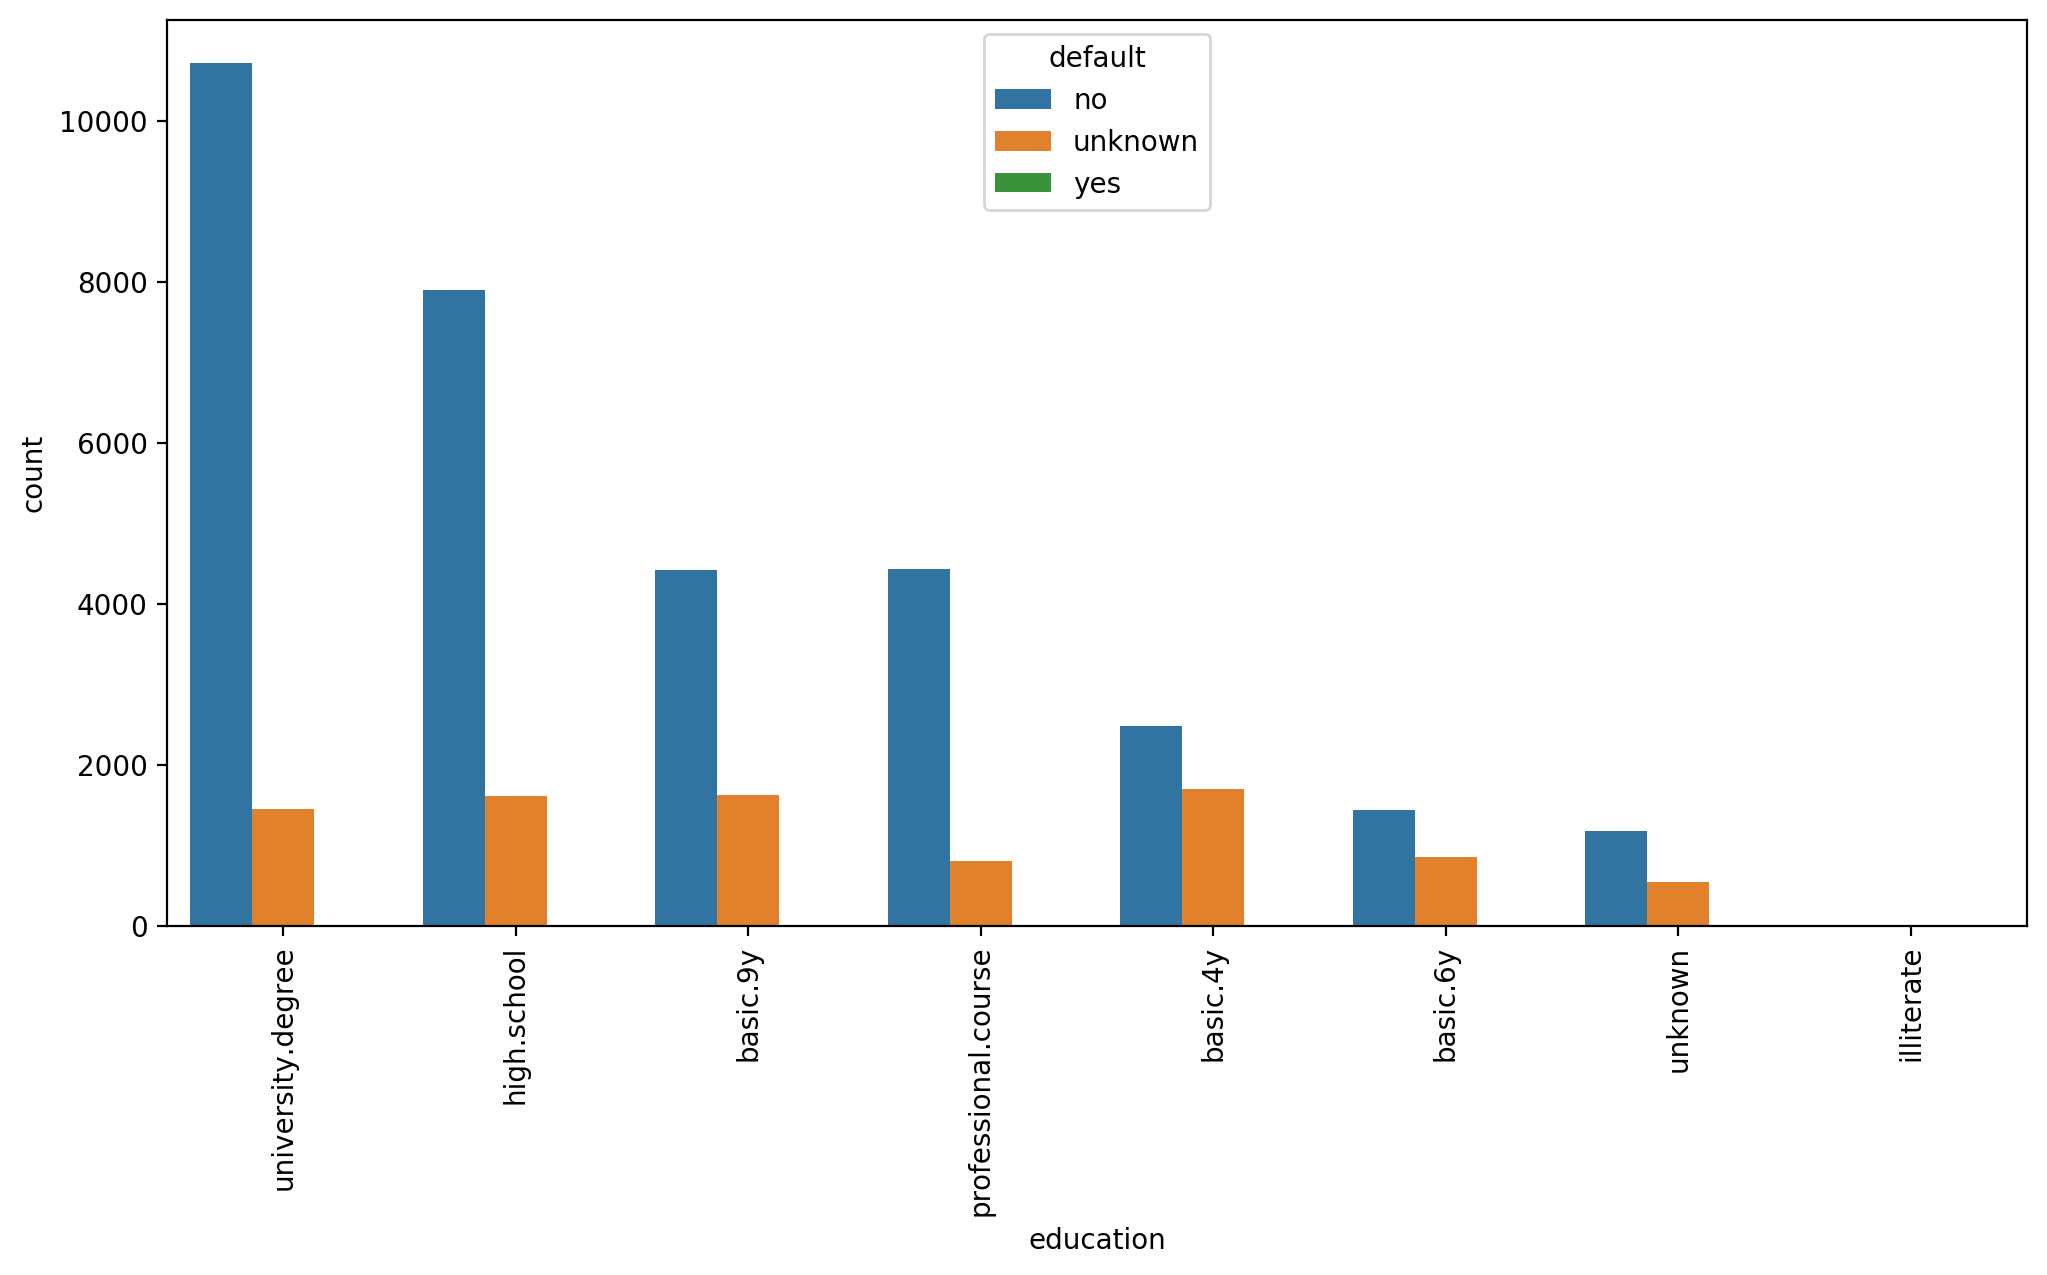

In [16]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

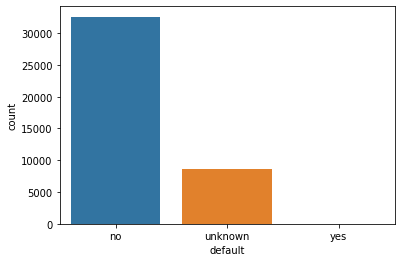

In [184]:
sns.countplot(data=df,x='default')

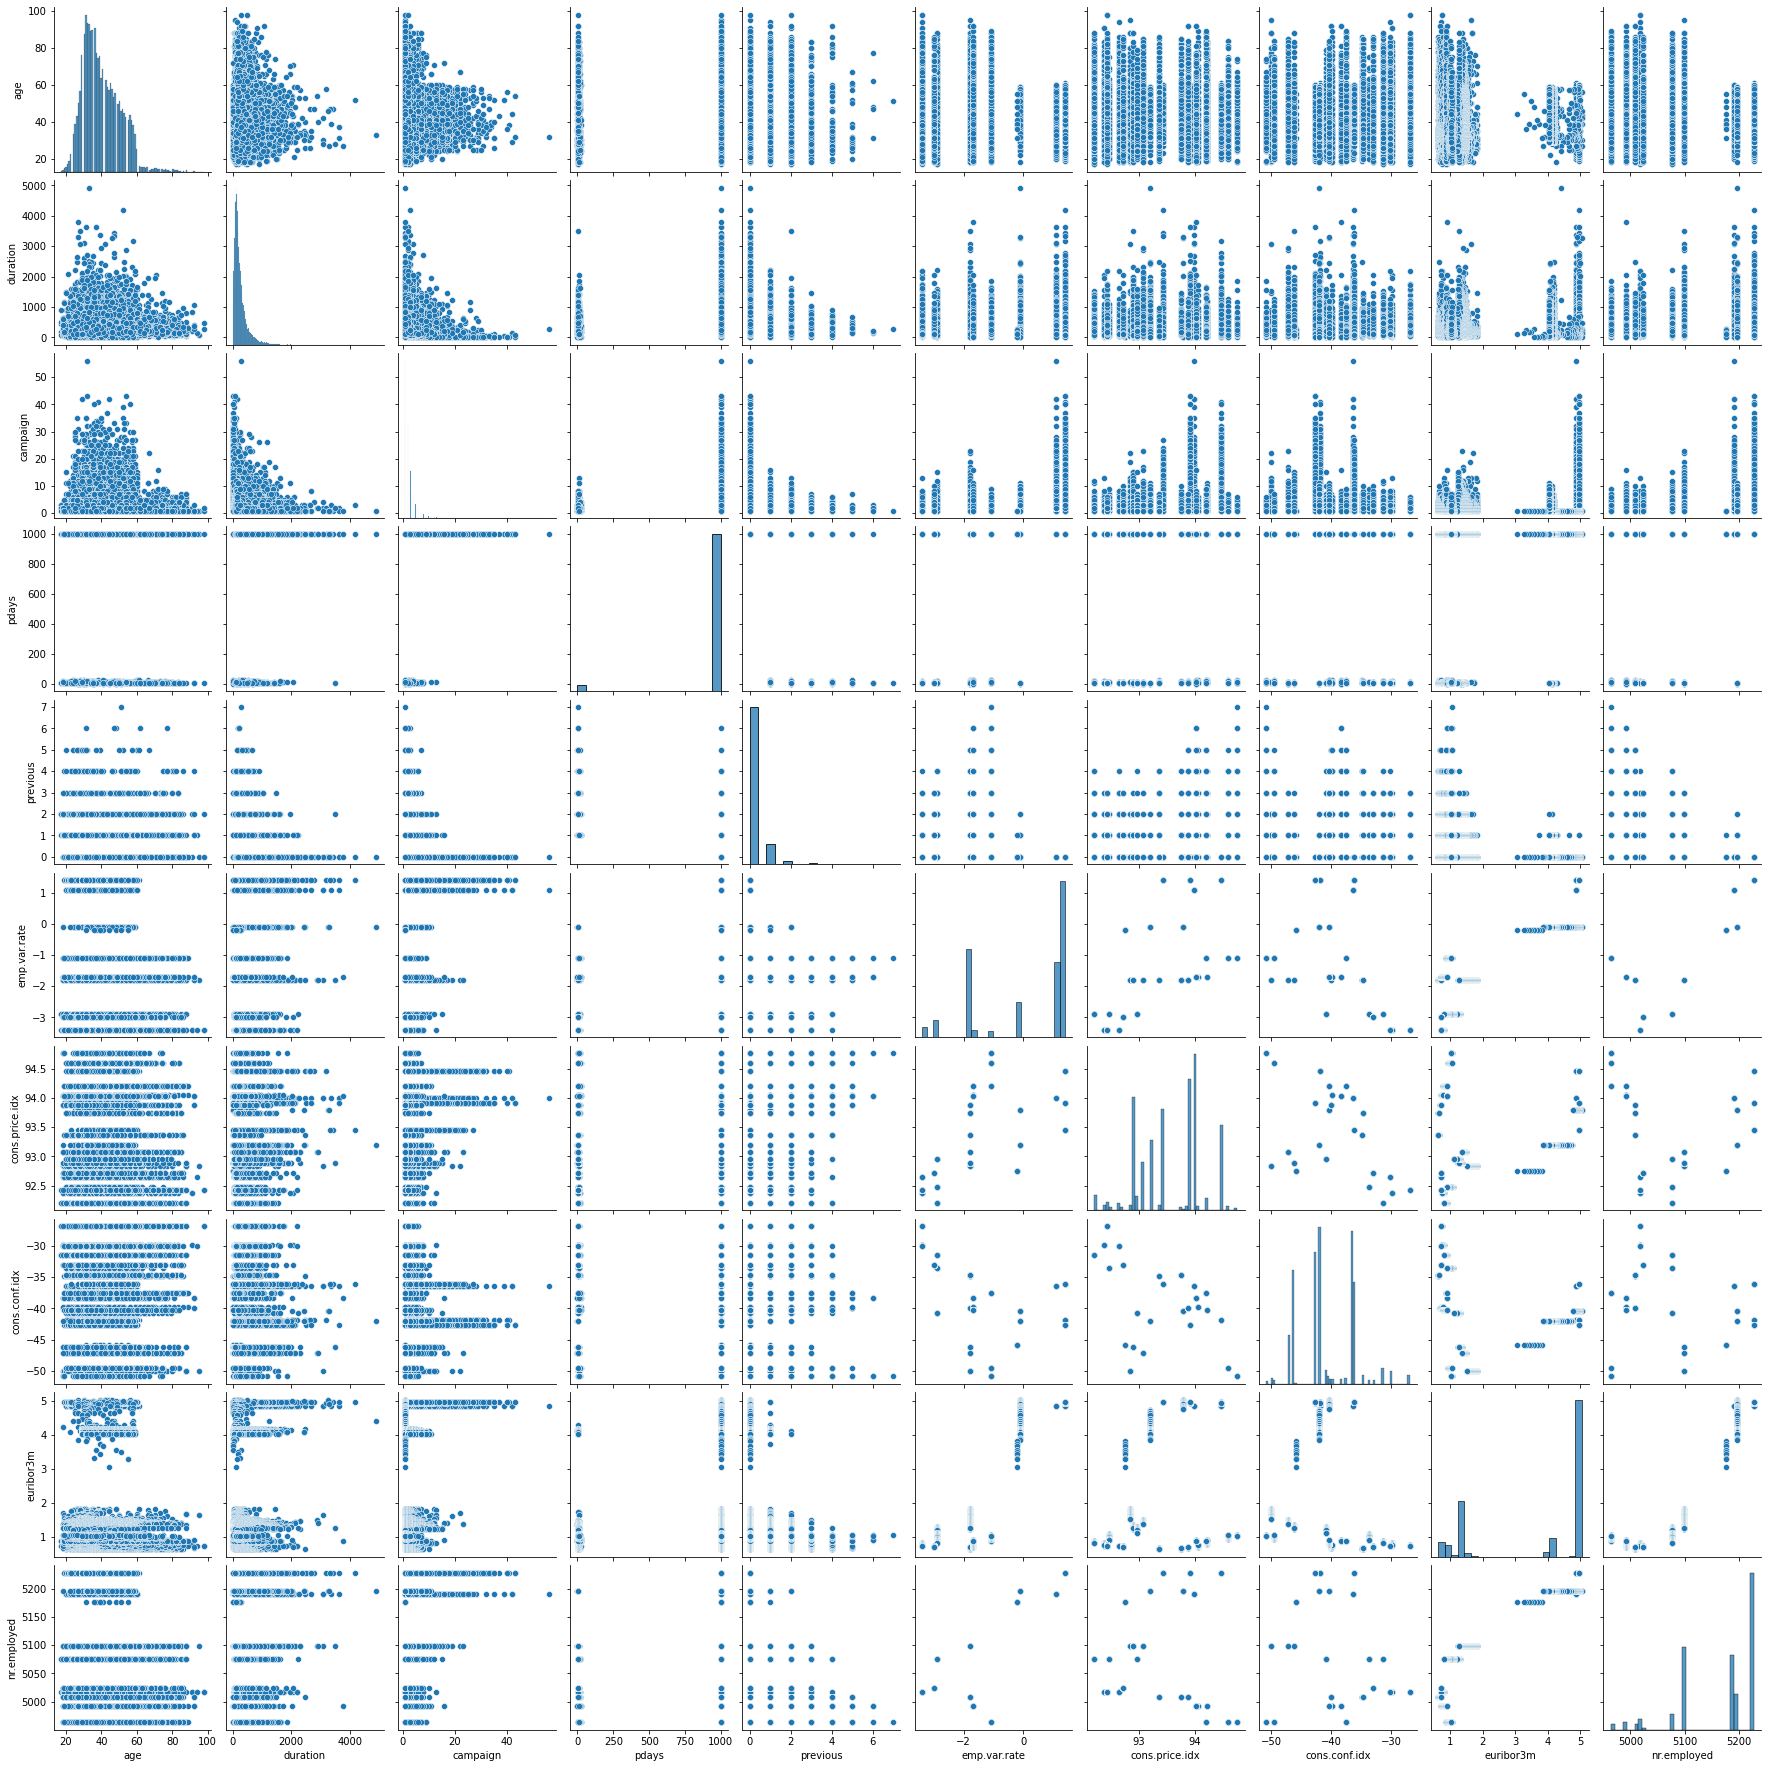

In [185]:
# با توجه به حجم داده ها و متغیر ها این خیلی طول میکشه! مواظب باش
sns.pairplot(df)

## Clustering
## K means


### آماده سازی داده ها

**چون یادگیری بدون ناظر هست نیازی به ترین تست اسپلیت نیست**



In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### تبدیل متغیر های متنی به عددی
همون طور که اشاره شد ورودی ها در این الگوریتم باید حتما از جنس عدد باشن پس از دستور زیر استفاده می کنیم

In [20]:
X = pd.get_dummies(df)

In [22]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


#### استاندارد سازی داده ها
گفتیم که در این الگوریتم متغیر های مختلف باید استاندارد شده باشند

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X = scaler.fit_transform(X)

### پیاده سازی مدل
برای شروع تعداد کی یا گروه ها را 2 در نظر می گیریم


In [28]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=2)

In [30]:
cluster_labels = model.fit_predict(scaled_X)

In [31]:
# شماره گروه ها ممکنه در هر تکرار تغییر کنه
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
len(scaled_X)

41188

In [33]:
len(cluster_labels)

41188

In [34]:
X['Cluster'] = cluster_labels

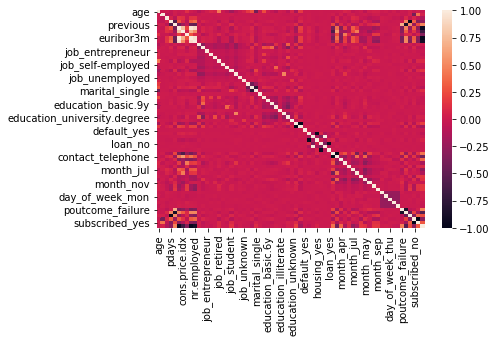

In [35]:
sns.heatmap(X.corr())

توسط تابع کورلیشن می تونیم شدت اثر متغیر های متختلف رو در تعیین متغیر خروجی ببینیم

In [36]:
X.corr()['Cluster']

age                    -0.019699
duration                0.039894
campaign               -0.129129
pdays                  -0.267700
previous                0.478467
                          ...   
poutcome_nonexistent   -0.544377
poutcome_success        0.254393
subscribed_no          -0.294610
subscribed_yes          0.294610
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

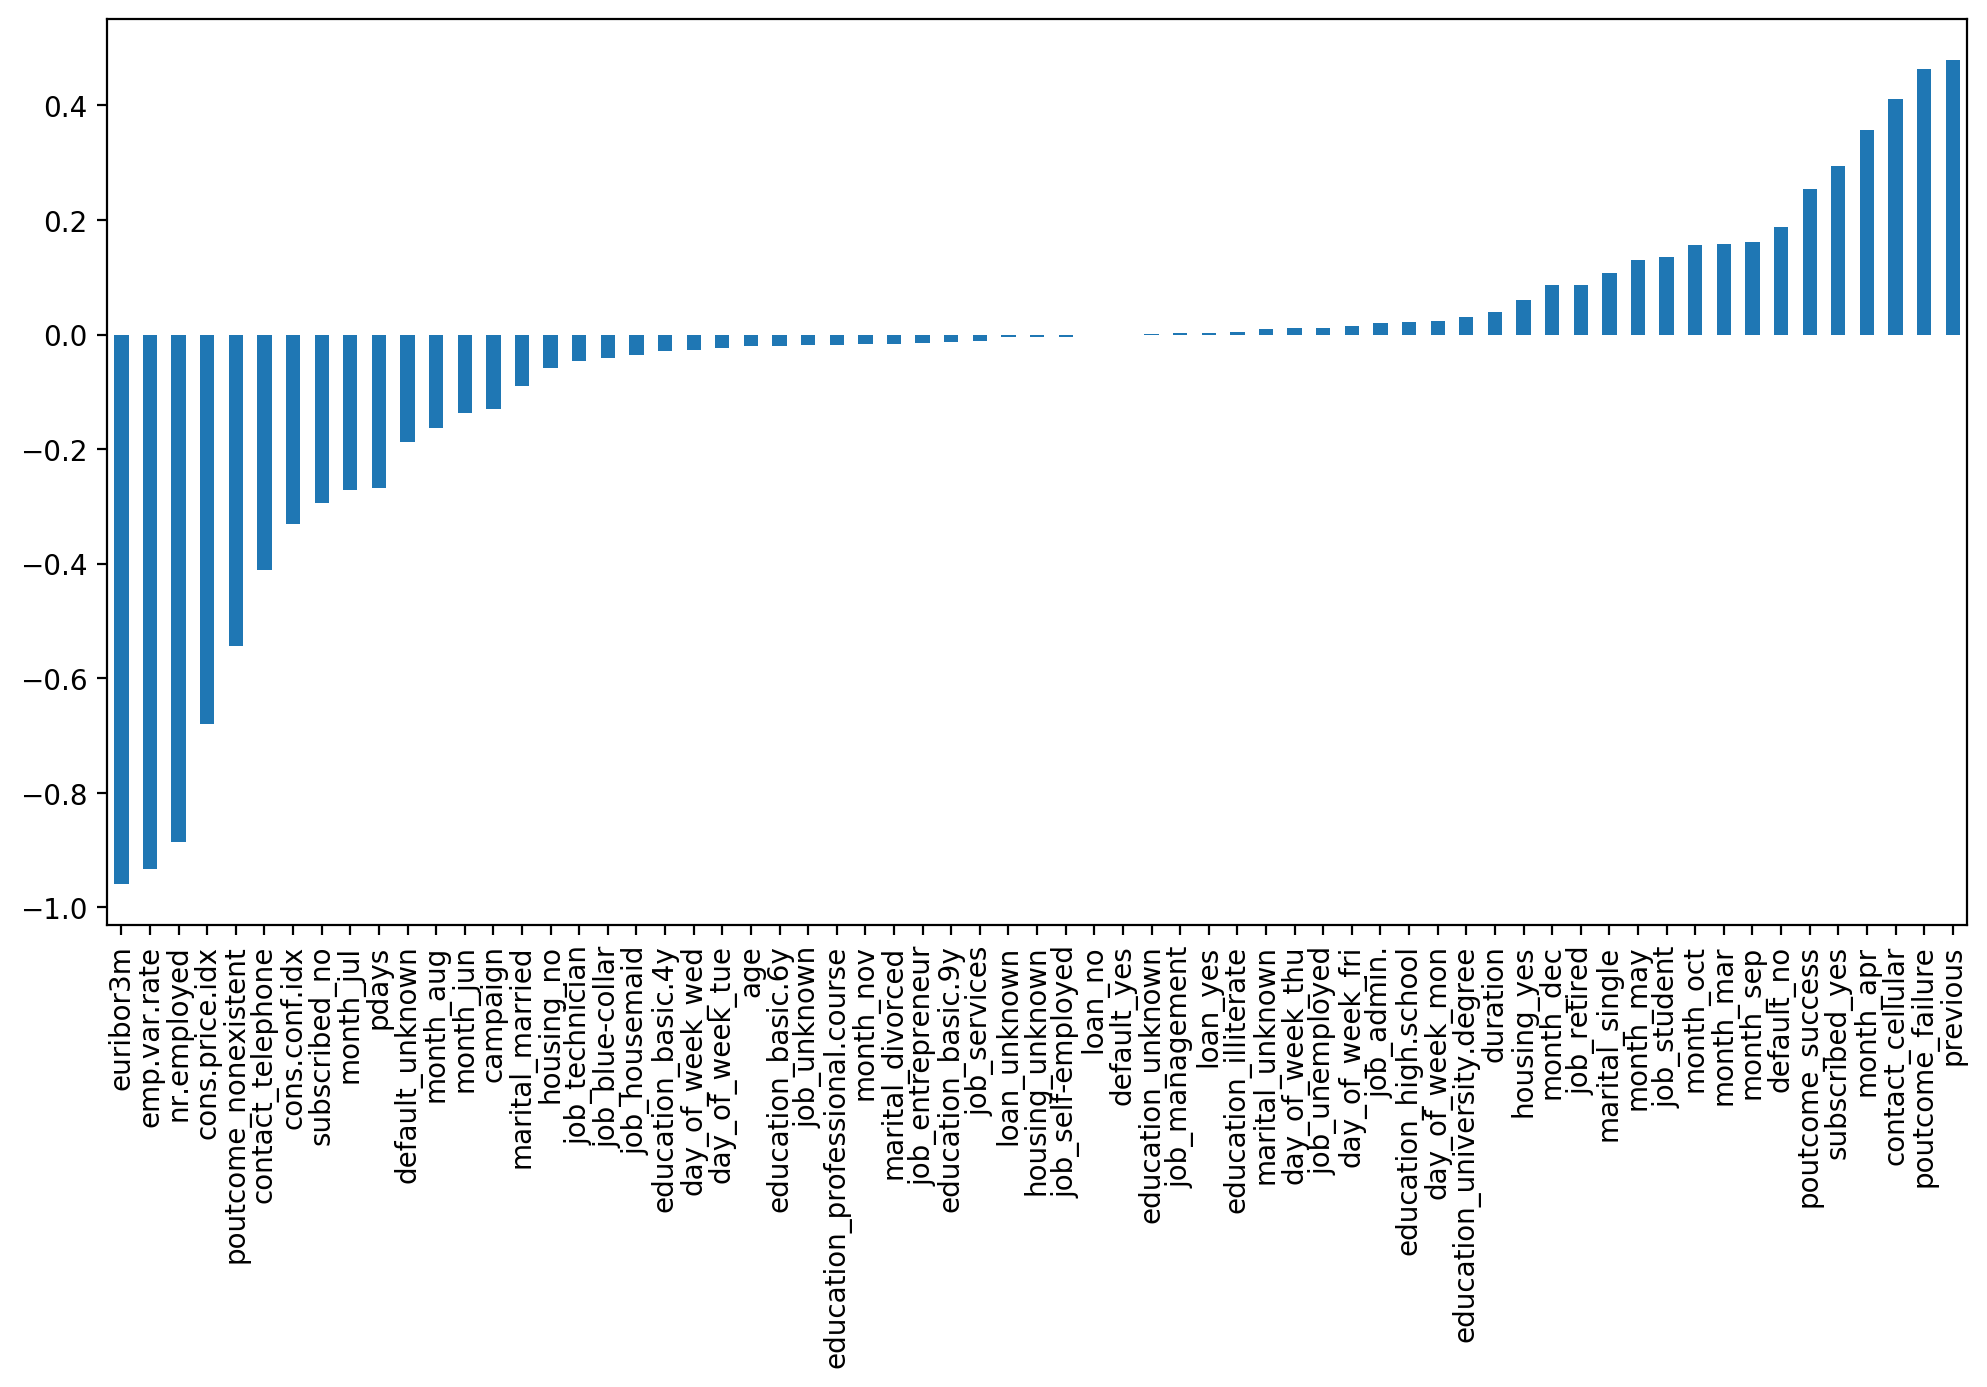

In [37]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## انتخاب مقدار بهینه
## K
برای این کار تابع زیر را تعریف می کنیم. در نهایت و زمانی که تعداد گروه ها به سمت صفر میل می کنن، این مشخصه برابر با صفر مشه. کار این تابع محاسبه 
<br>
SSD
<br>
در مقابل افزایش تعداد گروه ها یا کی می باشد
با رسم این روند متوجه میشیم باز هم جواب 100 درصد صحیحی وجود نداره! اما در یه جاهایی از نمودار مشاهده میشه که با افزایش گروه، خطای مذکور به مقدار **خیلی کم تری** نسبت به مرحله قبل، **کاهش پیدا کرده**. این نقاط می تونن نقاط بهینه تری برای مسئله ما باشن 


In [38]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    

    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

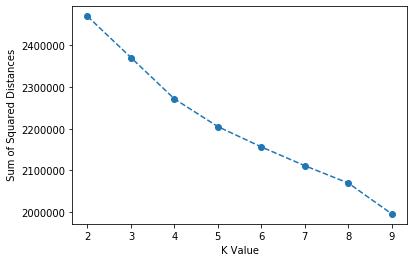

In [39]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

در بعضی از گام ها کاهش کمتری در این مشخصه اتفاق افتاده

In [40]:
ssd

[2469792.361662752,
 2370786.4144882634,
 2271502.84283045,
 2204983.652559844,
 2156288.7654091856,
 2111163.6169882366,
 2069491.1236021228,
 1995482.282191732]

In [41]:
# مشاهده تفاوت هر گام نسبت به گام پیشین
pd.Series(ssd).diff()

0             NaN
1   -99005.947174
2   -99283.571658
3   -66519.190271
4   -48694.887151
5   -45125.148421
6   -41672.493386
7   -74008.841410
dtype: float64

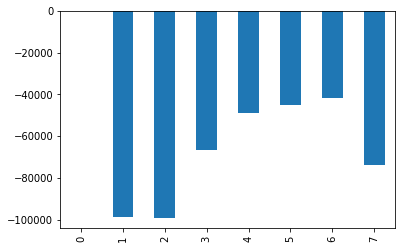

In [42]:
pd.Series(ssd).diff().plot(kind='bar')